Read file

In [75]:
import requests
import os
import warnings
from tqdm import tqdm
import numpy as np
import zipfile
import rioxarray
import xarray_leaflet
from ipyleaflet import Map, basemaps, LayersControl, WidgetControl
from ipywidgets import FloatSlider
import matplotlib.pyplot as plt
import fsspec
import s3fs
import xarray as xr
ovhBucket = s3fs.S3FileSystem(client_kwargs={'endpoint_url': 'https://s3.SBG.cloud.ovh.net','region_name':"sbg"},
      key='12902bcf746d47b6999045a29c560d3a',secret='8a0a7d67280f4ebdb92e35964bc21228')
store = s3fs.S3Map(root='hdsa/prisma-subset.zarr', s3=ovhBucket, check=False)
dataset = xr.open_zarr(store) # open with xarray


dataset = dataset.rename_vars({"longitude":"x","latitude":"y"})
dataset = dataset.swap_dims({"longitude":"x","latitude":"y"})
#dataset = dataset.rename_dims({"longitude":"x","latitude":"y"})
#dataset.set = dataset.longitude.rename("x")£

In [76]:
rf = dataset['reflectance'].isel(wavelength=0) # First we load the reflectance variable


In [77]:

rf.rio.set_spatial_dims("x","y",inplace=True)
rf.rio.write_crs("EPSG:32630",inplace=True)
rf.rio.write_nodata(11, inplace=True)

<xarray.DataArray 'reflectance' (y: 7, x: 1243)>
dask.array<getitem, shape=(7, 1243), dtype=uint16, chunksize=(7, 256), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 4.406e+06 4.406e+06 ... 4.406e+06 4.406e+06
  * x            (x) float64 2.477e+05 2.477e+05 ... 2.849e+05 2.85e+05
    wavelength   float64 402.4
    spatial_ref  int64 0
Attributes:
    addoffset:    0.0
    scalefactor:  1.5e-05
    units:        reflectance
    _FillValue:   11

In [78]:
r3 = rf.rio.reproject("EPSG:4326")

Transform to EPSG 4326

In [79]:
r3

<xarray.DataArray 'reflectance' (y: 35, x: 1243)>
array([[11, 11, 11, ...,  0,  0,  0],
       [11, 11, 11, ...,  0,  0,  0],
       [11, 11, 11, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 11, 11, 11],
       [ 0,  0,  0, ..., 11, 11, 11],
       [ 0,  0,  0, ..., 11, 11, 11]], dtype=uint16)
Coordinates:
  * x            (x) float64 -5.945 -5.945 -5.945 ... -5.512 -5.511 -5.511
  * y            (y) float64 39.77 39.77 39.77 39.77 ... 39.76 39.76 39.76 39.76
    wavelength   float64 402.4
    spatial_ref  int64 0
Attributes:
    addoffset:    0.0
    scalefactor:  1.5e-05
    units:        reflectance
    _FillValue:   11

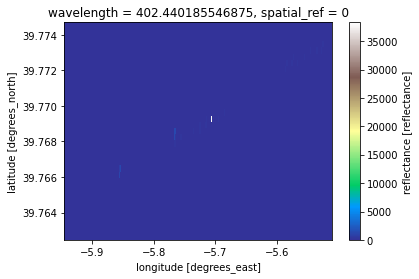

In [81]:
#rf.plot.pcolormesh(cmap='terrain') 
r3.plot.pcolormesh(cmap='terrain') 

In [82]:
m = Map(center=[40, -6], zoom=4, basemap=basemaps.CartoDB.DarkMatter, interpolation='nearest')
m


Map(center=[40, -6], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

In [83]:
warnings.filterwarnings("ignore")
#rf.leaflet.plot(m,  x_dim="longitude", y_dim="latitude",colormap=plt.cm.terrain)
rf.leaflet.plot(m,colormap=plt.cm.terrain)


Url()

LocalTileLayer(name='reflectance', options=['attribution', 'detect_retina', 'max_native_zoom', 'max_zoom', 'mi…